In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Read the data
train = pd.read_csv('kc_house_train_data.csv')
test = pd.read_csv('kc_house_test_data.csv')

In [4]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Model 1 - Input Square Feet

In [5]:
#This function takes input as features and target_output
#Returns slope and intercept using closed form solution
def simple_linear_regression(X, y):
    numerator = sum([X[i]*y[i] for i in range(len(X))]) - (np.sum(np.array(y)) * np.sum(np.array(X)))/len(X)
    denominator = np.sum(np.array([(X[i])**2 for i in range(len(X))])) - (np.sum(np.array(X)) * np.sum(np.array(X)))/len(X)
    slope = numerator/denominator
    intercept = np.mean(np.array([y[i] - slope*X[i] for i in range(len(X))])) 
    return (slope, intercept)

In [9]:
input_feature = train['sqft_living']
output = train['price']
squarfeet_slope, squarefeet_intercept = simple_linear_regression(input_feature.ravel(), output.ravel())

In [10]:
squarfeet_slope, squarefeet_intercept

(281.9588396303426, -47116.07907289415)

In [8]:
def vizualization(X, y):
    plt.plot(X,y)

In [13]:
def get_regression_predictions(X, intercept, slope):
    #Predict the values 
    predicted_output = [(slope*ele + intercept) for ele in X]
    return(predicted_output)

In [39]:
prediction = get_regression_predictions(input_feature.ravel(), squarefeet_intercept, squarfeet_slope)

## Price for the house with Sq.ft living =  2650 sqft

In [21]:
result_df = pd.DataFrame({'sqft_living':input_feature, 'predicted_price':prediction}, columns=['sqft_living', 'predicted_price'])
result_df.loc[result_df['sqft_living']==2650,:]

,sqft_living,predicted_price
247,2650,700074.845948
1354,2650,700074.845948
1844,2650,700074.845948
1874,2650,700074.845948
2163,2650,700074.845948
2420,2650,700074.845948
3324,2650,700074.845948
4209,2650,700074.845948
4456,2650,700074.845948
4549,2650,700074.845948


In [22]:
a = len(result_df['sqft_living'])
b = len(np.unique(np.array(result_df['sqft_living'])))
a == b
print("%d\n%d\n" %(a,b))

17384
957



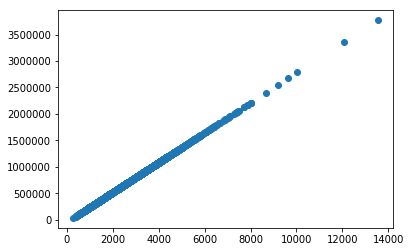

In [24]:
plt.scatter(result_df['sqft_living'], result_df['predicted_price'])

## RSS (Residual Sum of Squares)

In [25]:
def get_residual_sum_of_squares(X, y, intercept,slope):
    predicted = [(slope*x + intercept) for x in X]
    RSS = sum([(act-pred)**2 for act,pred in zip(y, predicted)])
    return(RSS)

In [41]:
residual_sum_squares_1 = get_residual_sum_of_squares(input_feature.ravel(), output, squarefeet_intercept, squarfeet_slope)

In [27]:
residual_sum_squares

1201918354177285.8

In [54]:
residual_sum_squares/10**15

1.2019183541772858

In [28]:
def inverse_regression_predictions(output, intercept, slope):
    estimated_input = (output-intercept)/slope
    return(estimated_input)

## According to this function and the regression slope and intercept from (3) what is the estimated square-feet for a house costing $800,000?

In [30]:
estimated_X = inverse_regression_predictions(800000, squarefeet_intercept, squarfeet_slope)

In [31]:
print("The estimated square feet for a house costing $800,000:- %.4f" %(estimated_X))

The estimated square feet for a house costing $800,000:- 3004.3962


## Model 2 - Input Bedroom

In [32]:
input_feature_2 = train['bedrooms']

In [33]:
bedroom_slope, bedroom_intercept = simple_linear_regression(input_feature_2.ravel(), output.ravel())

In [34]:
bedroom_slope, bedroom_intercept

(127588.95293398784, 109473.17762295966)

In [36]:
help(np.invert)

Help on ufunc object:

invert = class ufunc(builtins.object)
 |  Functions that operate element by element on whole arrays.
 |  
 |  To see the documentation for a specific ufunc, use `info`.  For
 |  example, ``np.info(np.sin)``.  Because ufuncs are written in C
 |  (for speed) and linked into Python with NumPy's ufunc facility,
 |  Python's help() function finds this page whenever help() is called
 |  on a ufunc.
 |  
 |  A detailed explanation of ufuncs can be found in the docs for :ref:`ufuncs`.
 |  
 |  Calling ufuncs:
 |  ===============
 |  
 |  op(*x[, out], where=True, **kwargs)
 |  Apply `op` to the arguments `*x` elementwise, broadcasting the arguments.
 |  
 |  The broadcasting rules are:
 |  
 |  * Dimensions of length 1 may be prepended to either array.
 |  * Arrays may be repeated along dimensions of length 1.
 |  
 |  Parameters
 |  ----------
 |  *x : array_like
 |      Input arrays.
 |  out : ndarray, None, or tuple of ndarray and None, optional
 |      Alternate arra

In [40]:
prediction_2 = get_regression_predictions(input_feature_2.ravel(), bedroom_intercept, bedroom_slope)

In [43]:
residual_sum_squares_2 = get_residual_sum_of_squares(input_feature_2.ravel(), output, bedroom_intercept, bedroom_slope)

In [44]:
residual_sum_squares_2

2143244498162068.8

In [45]:
residual_sum_squares_1

1201918354177285.8

## Compare the two models on the criteria of RSS on Test Data

### Model 1

In [47]:
#Model Square Feet
#Please use the name "squarfeet_slope" instead of "squarefeet_slope"
input_feature_test_squarefeet = test['sqft_living']
prediction_test_squarefeet = get_regression_predictions(input_feature_test_squarefeet.ravel(), squarefeet_intercept, squarfeet_slope)

In [48]:
residual_sum_squares_1_test = get_residual_sum_of_squares(input_feature_test_squarefeet.ravel(), output, squarefeet_intercept, squarfeet_slope)

In [49]:
residual_sum_squares_1_test

931869355290033.2

### Model 2

In [50]:
#Model Bedrooms
input_feature_test_bedroom = test['bedrooms']
prediction_test_bedroom = get_regression_predictions(input_feature_test_bedroom.ravel(), bedroom_intercept, bedroom_slope)

In [51]:
residual_sum_squares_2_test = get_residual_sum_of_squares(input_feature_test_bedroom.ravel(), output, bedroom_intercept, bedroom_slope)

In [52]:
residual_sum_squares_2_test

736452059584870.1

In [53]:
if(residual_sum_squares_1_test<residual_sum_squares_2_test):
    print("Model 1")
else:
    print("Model 2")

Model 2


In [56]:
residual_sum_squares_1_test/10**15

0.9318693552900332

In [57]:
residual_sum_squares_2_test/10**15

0.7364520595848701